In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pickle

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [7]:
# Reference dataframe with taxi information indexed by zipcodes
with open('/Users/peidacai/GA-DSI/projects/projects-capstone/part-05/assets/taxi_ref_df.pkl', 'r') as f:
    taxi_ref_df = pickle.load(f)

# Reference dataframe with yelp review information indexed by zipcodes
with open('/Users/peidacai/GA-DSI/projects/projects-capstone/part-05/assets/full_yelp_ref_df.pkl', 'r') as f:
    yelp_ref_df = pickle.load(f)

# Prediction RandomForest regressor ML model
with open('/Users/peidacai/GA-DSI/projects/projects-capstone/part-05/assets/model.pkl', 'r') as f:
    model = pickle.load(f)

# StandardScaler fitted to training X data, used to transform continuous data of x
with open('/Users/peidacai/GA-DSI/projects/projects-capstone/part-05/assets/x_scaler.pkl', 'r') as f:
    ss_x = pickle.load(f)

# StandardScaler fitted to training y data, used to inverse transform predict y
with open('/Users/peidacai/GA-DSI/projects/projects-capstone/part-05/assets/y_scaler.pkl', 'r') as f:
    ss_y = pickle.load(f)

# Empty X input dataframe for zipcodes
with open('/Users/peidacai/GA-DSI/projects/projects-capstone/part-05/assets/x_zip.pkl', 'r') as f:
    x_zip = pickle.load(f)

# Function to populate respective cell in zipcode dataframe
def set_zip(zipcode, zip_df):
    if zipcode == '10001':
        return zip_df
    else:
        try:
            for i in zip_df.columns:
                new_i = i.replace('Zip__', '')
                if new_i == zipcode:
                    zip_df.loc[0, i] = 1
                    return zip_df
                else:
                    return zip_df
        except:
            return zip_df

In [8]:
zipcode = 10010
area = 20000

In [14]:
taxi_ref_df.head()

,day_0,day_1,day_2,day_3,day_4,day_5,day_6,dropoff_hour_0,dropoff_hour_1,dropoff_hour_10,...,dropoff_hour_5,dropoff_hour_6,dropoff_hour_7,dropoff_hour_8,dropoff_hour_9,dropoff_count,dropoff_hr_0600_1200,dropoff_hr_1200_1800,dropoff_hr_1800_2359,dropoff_hr_2359_0600
10302,3.0,5.0,3.0,5.0,3.0,3.0,4.0,1.0,0.0,1.0,...,0.0,0.0,1.0,2.0,0.0,26.0,5.0,8.0,12.0,3.0
10308,46.0,55.0,54.0,62.0,57.0,62.0,58.0,19.0,13.0,24.0,...,8.0,10.0,12.0,14.0,17.0,394.0,95.0,110.0,133.0,59.0
10309,3.0,2.0,1.0,2.0,4.0,3.0,2.0,2.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,17.0,6.0,6.0,4.0,4.0
11040,513.0,527.0,559.0,600.0,570.0,598.0,529.0,183.0,120.0,167.0,...,31.0,81.0,137.0,155.0,178.0,3896.0,902.0,1124.0,1357.0,517.0
11096,513.0,527.0,559.0,600.0,570.0,598.0,529.0,183.0,120.0,167.0,...,31.0,81.0,137.0,155.0,178.0,3896.0,902.0,1124.0,1357.0,517.0


In [25]:
yelp_ref_df.head()

,Cost_mean,Rate_mean,Rate_std,Review_mean,Review_std,Sentiment_mean,Sentiment_std
10001,1.933333,4.300000,0.419120,177.800000,185.495949,0.232492,0.052806
10002,1.609524,4.154762,0.345278,372.595238,410.328067,0.216820,0.050205
10003,1.936364,4.154545,0.336611,423.927273,385.081590,0.220613,0.057615
10004,1.900000,4.000000,0.235702,399.700000,383.012344,0.236460,0.045858
10005,1.500000,4.050000,0.550252,290.200000,779.889565,0.235116,0.071144


In [84]:
a = 10023

In [103]:
a_cost = yelp_ref_df.loc[a, 'Cost_mean']

In [104]:
a_cost

2.2999999999999998

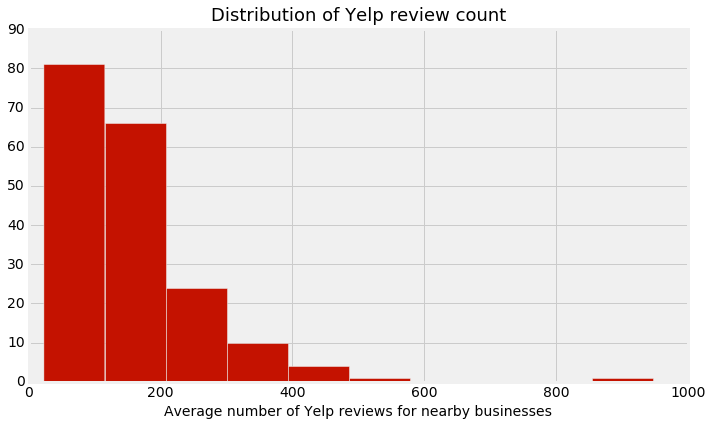

In [304]:
fig, axis = plt.subplots(1,1, figsize=(10,6))
axis.hist(yelp_ref_df['Review_mean'], color = '#c41200')
#axis.vlines(a_cost, 0, 45, colors= 'orange')
axis.tick_params(axis = 'both', labelsize = 14)
axis.set_xlabel('Average number of Yelp reviews for nearby businesses', fontsize = 14)
axis.set_title('Distribution of Yelp review count', y = 1.01, fontsize = 18)
plt.tight_layout()
plt.savefig('yelp_revcount_distribution.png')

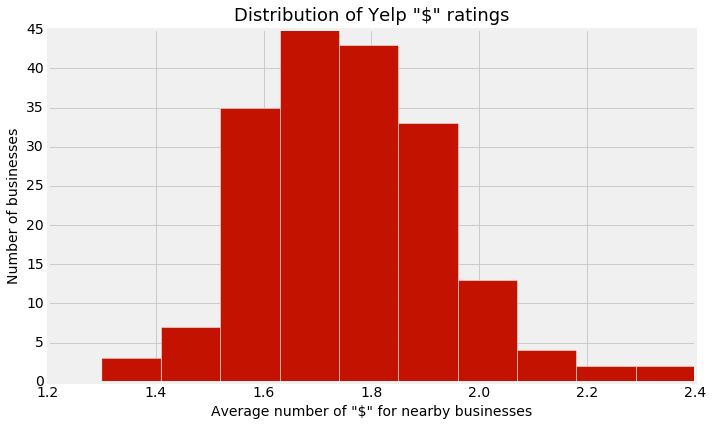

In [301]:
ax = yelp_ref_df['Cost_mean'].hist(bins = 10, figsize = (10,6), color = '#c41200')
#ax.vlines(a_cost, 0, 45, colors= 'orange')
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_xlabel('Average number of "$" for nearby businesses', fontsize = 14)
ax.set_ylabel('Number of businesses', fontsize =14)
ax.set_title('Distribution of Yelp "$" ratings', y = 1.01, fontsize = 18)
plt.tight_layout()
plt.savefig('yelp_star_distribution.png')

In [116]:
a_rate = yelp_ref_df.loc[a, 'Rate_mean']

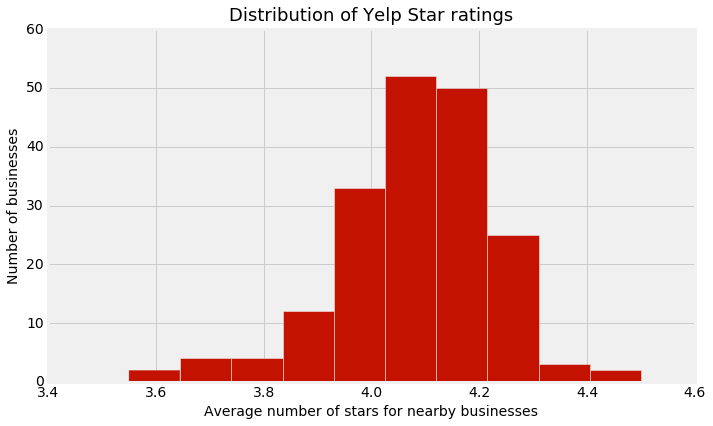

In [300]:
ax = yelp_ref_df['Rate_mean'].hist(bins = 10, figsize = (10,6), color = '#c41200')
#ax.vlines(a_rate, 0, 60, colors= 'orange')
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_xlabel('Average number of stars for nearby businesses', fontsize = 14)
ax.set_ylabel('Number of businesses', fontsize =14)
ax.set_title('Distribution of Yelp Star ratings', y = 1.01, fontsize = 18)
plt.tight_layout()
plt.savefig('yelp_star_distribution.png')

In [93]:
a_rev = yelp_ref_df.loc[a, 'Review_mean']

In [101]:
yelp_ref_df['Review_mean'].quantile()

125.6

In [99]:
a_rev / (.max()- yelp_ref_df['Review_mean'].min())

0.20172972972972972

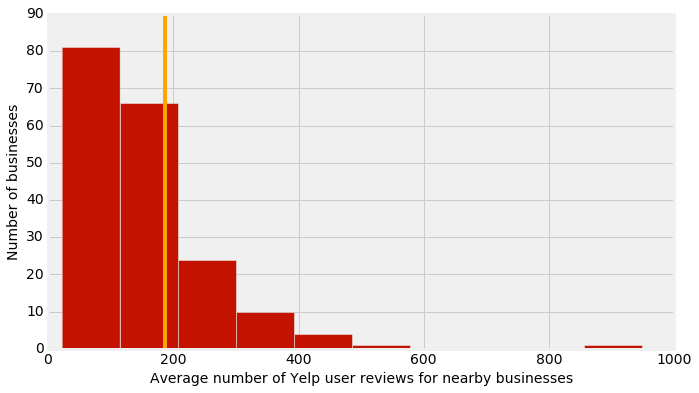

In [113]:
ax = yelp_ref_df['Review_mean'].hist(bins = 10, figsize = (10,6), color = '#c41200')
ax.vlines(a_rev, 0, 90, colors= 'orange')
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_xlabel('Average number of Yelp user reviews for nearby businesses', fontsize =14)
ax.set_ylabel('Number of businesses', fontsize =14)

In [ ]:
taxi_ref_df.sort_values('dropoff_count')

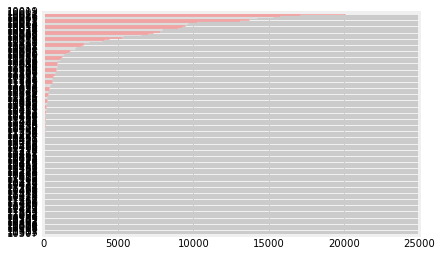

In [24]:
taxi_ref_df['dropoff_hr_0600_1200'].sort_values().plot(kind = 'barh', color = 'red')

In [9]:

# Get the respective row on taxi df based on zipcode
taxi = taxi_ref_df.loc[zipcode, ['dropoff_hr_0600_1200', 
                            'dropoff_hr_1200_1800', 
                            'dropoff_hr_1800_2359', 
                            'dropoff_hr_2359_0600']]

# Create floor area into a pandas series
floor_area = pd.Series([area], index = ['SF_avail'])

# Get the respective row on yelp df based on zipcode
yelp = yelp_ref_df.loc[zipcode, :]



In [12]:
taxi_ref_df.head()

,day_0,day_1,day_2,day_3,day_4,day_5,day_6,dropoff_hour_0,dropoff_hour_1,dropoff_hour_10,...,dropoff_hour_5,dropoff_hour_6,dropoff_hour_7,dropoff_hour_8,dropoff_hour_9,dropoff_count,dropoff_hr_0600_1200,dropoff_hr_1200_1800,dropoff_hr_1800_2359,dropoff_hr_2359_0600
10302,3.0,5.0,3.0,5.0,3.0,3.0,4.0,1.0,0.0,1.0,...,0.0,0.0,1.0,2.0,0.0,26.0,5.0,8.0,12.0,3.0
10308,46.0,55.0,54.0,62.0,57.0,62.0,58.0,19.0,13.0,24.0,...,8.0,10.0,12.0,14.0,17.0,394.0,95.0,110.0,133.0,59.0
10309,3.0,2.0,1.0,2.0,4.0,3.0,2.0,2.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,17.0,6.0,6.0,4.0,4.0
11040,513.0,527.0,559.0,600.0,570.0,598.0,529.0,183.0,120.0,167.0,...,31.0,81.0,137.0,155.0,178.0,3896.0,902.0,1124.0,1357.0,517.0
11096,513.0,527.0,559.0,600.0,570.0,598.0,529.0,183.0,120.0,167.0,...,31.0,81.0,137.0,155.0,178.0,3896.0,902.0,1124.0,1357.0,517.0


In [132]:
sub_df = taxi_ref_df.loc[10004,
                ['dropoff_hour_0', 'dropoff_hour_1', 'dropoff_hour_2', 
                 'dropoff_hour_3', 'dropoff_hour_4', 'dropoff_hour_5', 
                 'dropoff_hour_6', 'dropoff_hour_7', 'dropoff_hour_8', 
                 'dropoff_hour_9', 'dropoff_hour_10', 'dropoff_hour_11', 
                 'dropoff_hour_12', 'dropoff_hour_13', 'dropoff_hour_14', 
                 'dropoff_hour_15', 'dropoff_hour_16', 'dropoff_hour_17', 
                 'dropoff_hour_18', 'dropoff_hour_19', 'dropoff_hour_20', 
                 'dropoff_hour_21', 'dropoff_hour_22', 'dropoff_hour_23', 
                ]]

In [225]:
taxi_avg = taxi_ref_df[['dropoff_hour_0', 'dropoff_hour_1', 'dropoff_hour_2', 
                 'dropoff_hour_3', 'dropoff_hour_4', 'dropoff_hour_5', 
                 'dropoff_hour_6', 'dropoff_hour_7', 'dropoff_hour_8', 
                 'dropoff_hour_9', 'dropoff_hour_10', 'dropoff_hour_11', 
                 'dropoff_hour_12', 'dropoff_hour_13', 'dropoff_hour_14', 
                 'dropoff_hour_15', 'dropoff_hour_16', 'dropoff_hour_17', 
                 'dropoff_hour_18', 'dropoff_hour_19', 'dropoff_hour_20', 
                 'dropoff_hour_21', 'dropoff_hour_22', 'dropoff_hour_23', 
                ]].mean()

In [226]:
taxi_avg

dropoff_hour_0     287.641711
dropoff_hour_1     211.620321
dropoff_hour_2     152.657754
dropoff_hour_3     109.508021
dropoff_hour_4      83.978610
dropoff_hour_5      70.048128
dropoff_hour_6     139.385027
dropoff_hour_7     242.470588
dropoff_hour_8     307.566845
dropoff_hour_9     330.679144
dropoff_hour_10    321.368984
dropoff_hour_11    327.689840
dropoff_hour_12    350.786096
dropoff_hour_13    348.743316
dropoff_hour_14    357.684492
dropoff_hour_15    356.106952
dropoff_hour_16    320.048128
dropoff_hour_17    346.422460
dropoff_hour_18    432.021390
dropoff_hour_19    455.000000
dropoff_hour_20    421.556150
dropoff_hour_21    411.267380
dropoff_hour_22    400.053476
dropoff_hour_23    359.481283
dtype: float64

In [145]:
sub_df

dropoff_hour_0     368.0
dropoff_hour_1     226.0
dropoff_hour_2     169.0
dropoff_hour_3     139.0
dropoff_hour_4     116.0
dropoff_hour_5      96.0
dropoff_hour_6     189.0
dropoff_hour_7     304.0
dropoff_hour_8     395.0
dropoff_hour_9     423.0
dropoff_hour_10    389.0
dropoff_hour_11    402.0
dropoff_hour_12    421.0
dropoff_hour_13    417.0
dropoff_hour_14    404.0
dropoff_hour_15    436.0
dropoff_hour_16    410.0
dropoff_hour_17    391.0
dropoff_hour_18    496.0
dropoff_hour_19    564.0
dropoff_hour_20    507.0
dropoff_hour_21    489.0
dropoff_hour_22    466.0
dropoff_hour_23    419.0
Name: 10004, dtype: float64

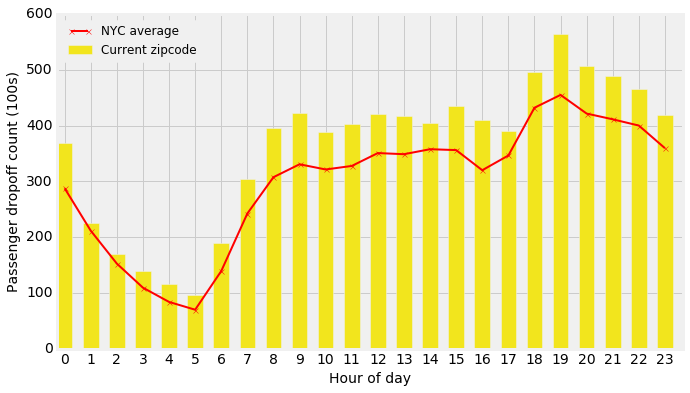

In [231]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
hr = np.arange(0, len(sub_df))
count = sub_df.values
width = 0.6
ax.bar(hr, count, width = width, color='#F2E51D', label = 'Current zipcode')
ax.set_xticklabels(np.arange(0,24))
ax.set_xticks(hr + width-0.3)
ax.plot((hr+(width/2.)), taxi_avg.values, 'xr-', linewidth = 2, markersize = 5, label = 'NYC average')
ax.legend(loc = 'best')


ax.tick_params(axis = 'both', labelsize = 14)
ax.set_xlim(0,24)
ax.set_xlabel('Hour of day', fontsize = 14)
ax.set_ylabel('Passenger dropoff count (100s)', fontsize = 14)

In [232]:
# Dropoff by day of week

dow_df = taxi_ref_df.loc[10004,
                ['day_0', 'day_1', 'day_2', 
                 'day_3', 'day_4', 'day_5', 
                 'day_6' 
                ]]

In [236]:
dow_avg = taxi_ref_df.loc[:,
                ['day_0', 'day_1', 'day_2', 
                 'day_3', 'day_4', 'day_5', 
                 'day_6' 
                ]].mean()

In [237]:
dow_avg

day_0     920.957219
day_1     996.524064
day_2    1048.887701
day_3    1071.962567
day_4    1070.518717
day_5    1076.566845
day_6     958.245989
dtype: float64

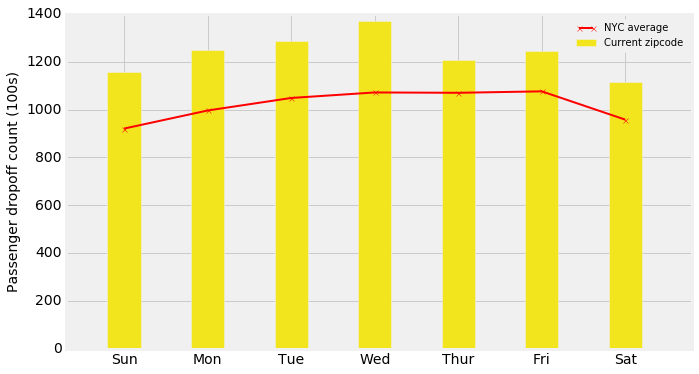

In [257]:
fig4, ax4 = plt.subplots(1,1, figsize=(10,6))
hr = np.arange(0, len(dow_df))
count = dow_df.values
width = 0.4
ax4.bar(hr, count, width = width, color='#F2E51D', label = 'Current zipcode')
ax4.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])
ax4.set_xticks(hr + width-0.2)
ax4.plot((hr+(width/2.)), dow_avg.values, 'xr-', linewidth = 2, markersize = 5, label = 'NYC average')
ax4.legend(loc = 'best', fontsize = 10)

ax4.tick_params(axis = 'both', labelsize = 14)
ax4.set_xlim(-.5,7)
ax4.set_ylabel('Passenger dropoff count (100s)', fontsize = 14)

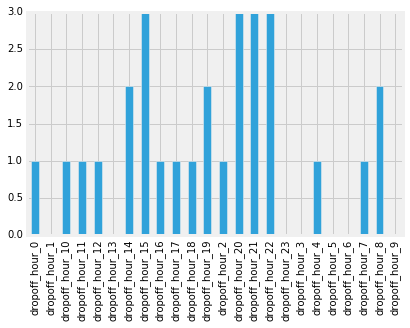

In [36]:
taxi_ref_df.iloc[0, 7:31].plot(kind = 'bar')

In [10]:
comb = pd.DataFrame(pd.concat([floor_area, yelp, taxi], axis = 0))
comb = comb.T

scale_comb = pd.DataFrame(ss_x.transform(comb), columns = comb.columns)
inp_x = pd.concat([scale_comb, set_zip(str(zipcode), x_zip)], axis = 1)

y_pred = round(ss_y.inverse_transform(model.predict(inp_x))[0],2)
print y_pred

78.82


In [291]:
print 1e5

100000.0


In [297]:
for i in range(1,int(raw_input())+1): #More than 2 lines will result in 0 score. Do not leave a blank line also
    print [j *(10**(i-j)) for j in range(i)]


5
[0]
[0, 10]
[0, 100, 20]
[0, 1000, 200, 30]
[0, 10000, 2000, 300, 40]


In [276]:
if __name__ == '__main__':
    n = int(raw_input())
    arr = map(int, raw_input().split())


5
5 3 6 7 2


In [277]:
arr

[5, 3, 6, 7, 2]

In [282]:
arr = sorted(arr)
arr[::-1]

[7, 6, 5, 3, 2]